
### Importing required libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, fbeta_score
import matplotlib.pyplot as plt

### loading and splitting the dataset into training and test 

In [35]:
df = pd.read_csv('H:/diabetes.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)



### Decision Tree model training and evaluating  

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_f2 = fbeta_score(y_test, dtc_pred, beta=2)
print('Decision Tree accuracy:', dtc_acc)
print('Decision Tree F2 score:', dtc_f2)



Decision Tree accuracy: 0.7402597402597403
Decision Tree F2 score: 0.6761565836298934


### Random Forest model training and evaluating

In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_recall = recall_score(y_test, rfc_pred)
rfc_f2 = fbeta_score(y_test, rfc_pred, beta=2)
print('Random Forest accuracy:', rfc_acc)

print('Random Forest F2 score:', rfc_f2)

Random Forest accuracy: 0.7337662337662337
Random Forest F2 score: 0.6204379562043796


## Convolutional Neural Network

###  Importing  modules from the Keras library 

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D

### splitting the dataset into training and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)


### Defining evaluation metrics function

In [40]:
def evaluate(y_true, y_pred):
    accuracy = (y_true == y_pred).mean()
    recall = recall_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)
    return accuracy, f2


### Convolutional Neural Network (CNN) training and evaluating

In [41]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8,1)))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train.values.reshape(-1, 8, 1), y_train, epochs=150, batch_size=10, verbose=0)
cnn_model_pred = (dl_cnn.predict(X_test.values.reshape(-1, 8, 1)) > 0.5).astype(int).flatten()
cnn_model_acc, cnn_model_f2 = evaluate(y_test, cnn_model_pred)

print('CNN accuracy:', cnn_model_acc)

print('CNN F2 score:', cnn_model_f2)


CNN accuracy: 0.7077922077922078
CNN F2 score: 0.625


### Visualizing the accuracy scores

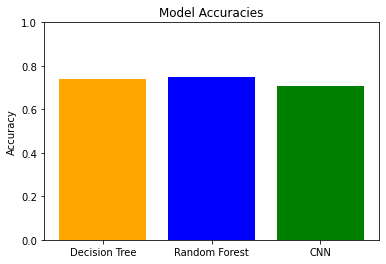

In [42]:
fig, ax = plt.subplots()
ax.bar(['Decision Tree', 'Random Forest', 'CNN'], [dtc_acc, rf_acc, cnn_model_acc], color=['orange', 'blue', 'green'])
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.set_title('Model Accuracies')

plt.show()